In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Detik News Title

In [ ]:
df = pd.read_csv("detik_news_title_preprocessing.csv", delimiter=",")
df.sample(20)

,date,url,title,category
81259,05/19/2020,https://oto.detik.com/profil/d-5021109/habib-b...,Habib Bahar dan Mobil-mobil Mewah Berpelat Nye...,oto
43830,04/27/2020,#,Kisah Mencekam Para Pemburu Virus Berbahaya di...,inet
71561,04/30/2020,https://news.detik.com/berita/d-4997284/serahk...,"Serahkan Bantuan ke RSCM, CT Harap ICU Bisa Ta...",news
6013,03/20/2020,https://finance.detik.com/bursa-dan-valas/d-49...,"Lika-liku IHSG Hari Ini: Tegang di Awal, Bahag...",finance
49029,04/14/2020,https://news.detik.com/berita/d-4976776/tingka...,"Tingkat Kesembuhan Pasien Corona di RI Kini 8,8%",news
60672,06/13/2020,https://news.detik.com/berita/d-5051957/bmkg-s...,BMKG: Siklon Tropis Nuri Terbentuk di Laut Chi...,news
57744,01/27/2020,https://news.detik.com/berita/d-4875601/polisi...,Polisi Tangkap Komplotan Begal Sadis di Tambun...,news
13826,04/09/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Hari Terakhir Pendataan Korban PHK DKI, Bagaim...",finance
89211,02/09/2020,https://travel.detik.com/domestic-destination/...,"Wisata ke Bogor, Yuk Kenalan dengan Tanaman Co...",travel
59388,02/27/2020,https://news.detik.com/berita/d-4916558/tiga-h...,Tiga Hari Underpass Kemayoran Tak Bisa Dilinta...,news


<Axes: title={'center': 'Values by category'}, xlabel='category'>

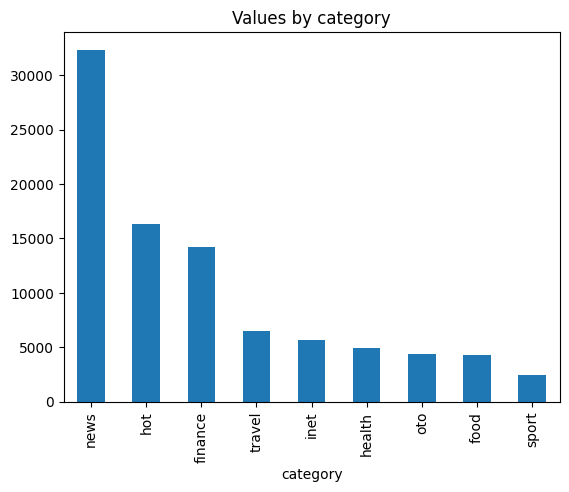

In [4]:
df['category'].value_counts().plot(x="Category", y="Values", kind="bar", title="Values by category")

In [5]:
df["category"].value_counts()

category
news       32360
hot        16330
finance    14168
travel      6466
inet        5640
health      4919
oto         4383
food        4315
sport       2436
Name: count, dtype: int64

In [8]:
df_small = df.groupby(by="category").sample(2400)
df_small.sample(25)

,date,url,title,category
26693,05/08/2020,https://hot.detik.com/kpop/d-5007012/jinho-jad...,Jinho Jadi Member Pentagon Pertama yang Umumka...,hot
18854,03/12/2020,https://health.detik.com/berita-detikhealth/d-...,"32 Meninggal akibat DBD di NTT, Ini Penyebab A...",health
31114,06/05/2020,https://hot.detik.com/celeb/d-5042060/suara-be...,"Suara Bergetar, Widi Mulia Akhirnya Bicara soa...",hot
2090,02/03/2020,https://finance.detik.com/infrastruktur/d-4884...,"Usai Longsor, 121 Akses di Sukajaya Bogor Suda...",finance
5780,01/22/2020,https://finance.detik.com/foto-bisnis/d-486889...,OJK Bersama DPR Bahas Pengawasan Jiwasraya,finance
18272,05/01/2020,https://food.detik.com/info-kuliner/d-4998530/...,Usai Corona Pasar Malam yang Jual Aneka Serang...,food
22413,05/31/2020,https://health.detik.com/berita-detikhealth/d-...,10 Asupan Tinggi Vitamin C Ini Bikin Kamu Kuat...,health
18916,03/02/2020,https://health.detik.com/berita-detikhealth/d-...,"RI Konfirmasi 2 Kasus Positif Corona, Patahkan...",health
18707,04/01/2020,https://health.detik.com/detiktv/d-4961095/car...,Cara Mudah Hindari Corona Virus Sesuai Panduan...,health
83023,06/09/2020,https://sport.detik.com/sport-lain/d-5047213/m...,Manajer Khabib Nurmagomedov Sebut Conor McGreg...,sport


In [9]:
df_small = df_small[df_small["category"] != ""]
df_small['category'].value_counts()

category
finance    2400
food       2400
health     2400
hot        2400
news       2400
oto        2400
sport      2400
travel     2400
Name: count, dtype: int64

In [15]:
df_small.iloc[0]["url"]

'https://finance.detik.com/infrastruktur/d-5029231/melihat-jalan-raya-di-china-yang-dibangun-membelah-gurun-pasir'

In [23]:
soup = BeautifulSoup(requests.get(url=df_small.iloc[100]["url"]).text, "html.parser")
soup.p.contents

[<br/>,
 'Dalam hal ini keterbukaan finansial menjadi faktor penting. Sudah ada saling percaya, bahkan mulai tumbuh saling ketergantungan. Dan semua kepercayaan dan saling terbuka ini tidak akan terjadi, jika tidak dilatih sejak awal pacaran. ',
 <br/>,
 <br/>,
 'Biarkan hati yang menjajaki secara murni kecocokan masing-masing. Pacaran adalah proses mencari kesiapan untuk hidup senang maupun susah secara bersama. Inilah yang disebut pacaran yang sehat finansial.']

In [54]:
def get_text(x):
    return x.text.replace("\\n", "").strip()
def scrapping(url):
    soup = BeautifulSoup(requests.get(url=url).text, "html.parser")
    texts = soup.find_all("p")
    texts = list(map(get_text, texts))
    return "".join(texts)


In [55]:
df_small["text"] = ""
df_small

,date,url,title,category,text
4784,05/26/2020,https://finance.detik.com/infrastruktur/d-5029...,Melihat Jalan Raya di China yang Dibangun Memb...,finance,
6343,06/09/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Ketentuan Batas Penumpang Direvisi Kemenhub, J...",finance,
11978,04/02/2020,https://finance.detik.com/berita-ekonomi-bisni...,Sri Mulyani Ingatkan Pengusaha Jangan Aji Mump...,finance,
5128,04/05/2020,https://finance.detik.com/berita-ekonomi-bisni...,Erick Thohir Rampingkan 51 Anak Cucu BUMN,finance,
6973,03/02/2020,https://finance.detik.com/berita-ekonomi-bisni...,Warga Depok Mulai Kesulitan Dapat Masker,finance,
...,...,...,...,...,...
88847,05/08/2020,https://travel.detik.com/detiktravel/d-5006637...,Ini Rekomendasi Tempat Beli Oleh-oleh di Batu,travel,
89485,04/12/2020,https://travel.detik.com/travel-news/d-4973727...,"Biar Tisu Tidak Dicuri, Warga Jepang Pasang Ku...",travel,
89220,02/16/2020,https://travel.detik.com/travel-news/d-4901646...,Fakta Uang Koin yang Tercecer di Bandara,travel,
90696,03/31/2020,https://travel.detik.com/detiktravel/d-4959572...,Ini Rasanya Jadi Pengantin Minang di Anjungan ...,travel,


In [ ]:
df_small.loc[:10, "text"] = df_small.iloc[:10]["url"].apply(scrapping)
df_small.head(12)

C:\Users\Kocheng\AppData\Local\Temp\ipykernel_19496\530135319.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_small.iloc[:10]["text"] = df_small.iloc[:10]["url"].apply(scrapping)
C:\Users\Kocheng\AppData\Local\Temp\ipykernel_19496\530

,date,url,title,category,text
4784,05/26/2020,https://finance.detik.com/infrastruktur/d-5029...,Melihat Jalan Raya di China yang Dibangun Memb...,finance,
6343,06/09/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Ketentuan Batas Penumpang Direvisi Kemenhub, J...",finance,
11978,04/02/2020,https://finance.detik.com/berita-ekonomi-bisni...,Sri Mulyani Ingatkan Pengusaha Jangan Aji Mump...,finance,
5128,04/05/2020,https://finance.detik.com/berita-ekonomi-bisni...,Erick Thohir Rampingkan 51 Anak Cucu BUMN,finance,
6973,03/02/2020,https://finance.detik.com/berita-ekonomi-bisni...,Warga Depok Mulai Kesulitan Dapat Masker,finance,
13050,01/07/2020,https://finance.detik.com/berita-ekonomi-bisni...,Alhamdulillah! Bandara Kertajati Sah Jadi Emba...,finance,
169,06/12/2020,https://finance.detik.com/berita-ekonomi-bisni...,Pilot hingga Pramugari Harus Bisa Tangani Pasi...,finance,
3031,05/14/2020,https://finance.detik.com/berita-ekonomi-bisni...,Mochtar Riady Beberkan Syarat Negara Bisa Lolo...,finance,
1248,04/21/2020,https://finance.detik.com/industri/d-4985524/l...,Larangan Mudik Bakal Berdampak ke Industri Dal...,finance,
11212,03/13/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Anak Buah Ogah Urus Corona, Sri Mulyani: Saya ...",finance,


# Data-news-updated

In [71]:
df = pd.read_json("./backend_api/data/topic classification data/data-news-updated-2.0.json")
df

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,"Ekonomi, Pariwisata, Teknologi","Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,"Ekonomi, Pariwisata, Politik, Teknologi",Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,"Pariwisata, Teknologi","Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,"Otomotif, Pariwisata, Teknologi","""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227
...,...,...,...,...,...,...,...
1086,tribunnews.com,2015/07/01,"Kuliner, Teknologi, Travel",Kuliner Medan Sedap Harga Murah Meriah: Bubur ...,"TRIBUNNEWS.COM - Selain Bika Ambon, tiga kulin...",http://www.tribunnews.com/travel/2015/07/01/ku...,101
1087,tribunnews.com,2015/07/01,"Ekonomi, Hiburan, Pariwisata, Travel",Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197
1088,tribunnews.com,2015/07/01,"Teknologi, Travel",Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125
1089,tribunnews.com,2015/07/01,"Kuliner, Otomotif, Pendidikan, Teknologi, Travel",Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95


In [72]:
df['kategori'].value_counts()

kategori
Nasional, Teknologi                                     114
Nasional, Politik, Teknologi                             70
Nasional, Pariwisata, Teknologi                          61
Bola, Teknologi                                          50
Nasional, Pariwisata, Politik, Teknologi                 48
                                                       ... 
Kesehatan, Nasional, Otomotif, Pendidikan, Teknologi      1
Kuliner, Nasional, Otomotif, Teknologi                    1
Bola, Hiburan, Teknologi                                  1
Bola, Ekonomi, Olahraga, Pariwisata                       1
Kuliner, Otomotif, Pendidikan, Teknologi, Travel          1
Name: count, Length: 233, dtype: int64

In [73]:
def split_category(categories):
    return list(map(str.strip, categories.casefold().split(sep=',')))

In [74]:
list_categories = df['kategori'].apply(split_category).tolist()
list_categories

[['ekonomi', 'pariwisata', 'teknologi'],
 ['ekonomi', 'pariwisata', 'politik', 'teknologi'],
 ['pariwisata', 'teknologi'],
 ['otomotif', 'pariwisata', 'teknologi'],
 ['teknologi'],
 ['hiburan', 'pariwisata', 'teknologi'],
 ['ekonomi', 'fashion', 'teknologi'],
 ['ekonomi', 'pendidikan', 'politik', 'teknologi'],
 ['ekonomi', 'hiburan', 'otomotif', 'pariwisata', 'teknologi'],
 ['ekonomi', 'otomotif', 'pariwisata', 'teknologi'],
 ['ekonomi', 'pariwisata', 'politik', 'teknologi'],
 ['ekonomi', 'pariwisata', 'teknologi'],
 ['teknologi'],
 ['teknologi'],
 ['teknologi'],
 ['ekonomi', 'otomotif', 'teknologi'],
 ['hiburan', 'pariwisata', 'teknologi'],
 ['ekonomi', 'fashion', 'pariwisata', 'teknologi'],
 ['pariwisata', 'teknologi'],
 ['hiburan', 'olahraga', 'otomotif', 'pariwisata', 'teknologi'],
 ['bisnis ekonomi', 'ekonomi', 'pariwisata', 'teknologi'],
 ['bisnis ekonomi', 'ekonomi', 'fashion', 'teknologi'],
 ['bisnis ekonomi',
  'ekonomi',
  'hiburan',
  'otomotif',
  'pariwisata',
  'politik',

In [75]:
df_list_categories = (
                    pd.DataFrame(list_categories)
                    .stack() # mengubah list 2D menjadi format 1D.
                    .reset_index(drop=True) # mereset indeks setelah proses stacking.
                    .to_frame(name='Word') # mengonversi hasil stacking menjadi DataFrame dengan kolom "Word".
                    .groupby('Word').size() #  menghitung frekuensi kemunculan setiap kata.
                    .reset_index(name='Total') # mengonversi hasil groupby ke DataFrame dengan kolom 'Word' dan 'Total'.
                    .sort_values(by=['Total', 'Word'], ascending=[False, True]) # mengurutkan hasil berdasarkan total dan kata.
                    .reset_index(drop=True)
                )

df_list_categories

,Word,Total
0,teknologi,993
1,nasional,598
2,pariwisata,479
3,politik,347
4,ekonomi,227
5,bisnis ekonomi,150
6,bola,145
7,otomotif,137
8,pendidikan,102
9,olahraga,100


In [76]:
df['kategori'] = df['kategori'].apply(split_category)
df

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,"[ekonomi, pariwisata, teknologi]","Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,"[ekonomi, pariwisata, politik, teknologi]",Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,"[pariwisata, teknologi]","Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,"[otomotif, pariwisata, teknologi]","""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,[teknologi],Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227
...,...,...,...,...,...,...,...
1086,tribunnews.com,2015/07/01,"[kuliner, teknologi, travel]",Kuliner Medan Sedap Harga Murah Meriah: Bubur ...,"TRIBUNNEWS.COM - Selain Bika Ambon, tiga kulin...",http://www.tribunnews.com/travel/2015/07/01/ku...,101
1087,tribunnews.com,2015/07/01,"[ekonomi, hiburan, pariwisata, travel]",Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197
1088,tribunnews.com,2015/07/01,"[teknologi, travel]",Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125
1089,tribunnews.com,2015/07/01,"[kuliner, otomotif, pendidikan, teknologi, tra...",Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95


In [77]:
#  finance, health, hot, news, sport, *tech
categories = ['teknologi', 'politik', 'ekonomi', 'bisnis ekonomi', 'kesehatan', 'bola', 'olahraga']

df = df[df['kategori'].apply(lambda a: any(element in categories for element in a))]
df


,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,"[ekonomi, pariwisata, teknologi]","Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,"[ekonomi, pariwisata, politik, teknologi]",Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,"[pariwisata, teknologi]","Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,"[otomotif, pariwisata, teknologi]","""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,[teknologi],Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227
...,...,...,...,...,...,...,...
1086,tribunnews.com,2015/07/01,"[kuliner, teknologi, travel]",Kuliner Medan Sedap Harga Murah Meriah: Bubur ...,"TRIBUNNEWS.COM - Selain Bika Ambon, tiga kulin...",http://www.tribunnews.com/travel/2015/07/01/ku...,101
1087,tribunnews.com,2015/07/01,"[ekonomi, hiburan, pariwisata, travel]",Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197
1088,tribunnews.com,2015/07/01,"[teknologi, travel]",Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125
1089,tribunnews.com,2015/07/01,"[kuliner, otomotif, pendidikan, teknologi, tra...",Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95


In [78]:
df_explode = df.explode(column='kategori').reset_index(drop=True)
df_explode

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,ekonomi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,pariwisata,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
2,kompas.com,2015/07/01,teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
3,kompas.com,2015/07/01,ekonomi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
4,kompas.com,2015/07/01,pariwisata,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
...,...,...,...,...,...,...,...
3498,tribunnews.com,2015/07/01,teknologi,Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95
3499,tribunnews.com,2015/07/01,travel,Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95
3500,tribunnews.com,2015/07/01,ekonomi,"Nanang Tolak Tawaran Rp 2,5 Miliar untuk Fosil...","Laporan Wartawan Pos Kupang, Muhlis Al Alawi T...",http://www.tribunnews.com/travel/2015/07/01/na...,148
3501,tribunnews.com,2015/07/01,teknologi,"Nanang Tolak Tawaran Rp 2,5 Miliar untuk Fosil...","Laporan Wartawan Pos Kupang, Muhlis Al Alawi T...",http://www.tribunnews.com/travel/2015/07/01/na...,148


In [79]:
df_explode['kategori'].value_counts()

kategori
teknologi         993
nasional          552
pariwisata        474
politik           347
ekonomi           227
bisnis ekonomi    150
bola              145
otomotif          133
pendidikan        102
olahraga          100
kesehatan          64
hiburan            53
fashion            50
kuliner            45
travel             35
lifestyle          33
Name: count, dtype: int64

In [80]:
df_explode = df_explode[df_explode['kategori'].apply(lambda x: x in categories)]
df_explode

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,ekonomi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
2,kompas.com,2015/07/01,teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
3,kompas.com,2015/07/01,ekonomi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
5,kompas.com,2015/07/01,politik,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
6,kompas.com,2015/07/01,teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
...,...,...,...,...,...,...,...
3489,tribunnews.com,2015/07/01,ekonomi,Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197
3493,tribunnews.com,2015/07/01,teknologi,Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125
3498,tribunnews.com,2015/07/01,teknologi,Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95
3500,tribunnews.com,2015/07/01,ekonomi,"Nanang Tolak Tawaran Rp 2,5 Miliar untuk Fosil...","Laporan Wartawan Pos Kupang, Muhlis Al Alawi T...",http://www.tribunnews.com/travel/2015/07/01/na...,148


In [81]:
#  finance, health, hot, news, sport, *tech
# categories = ['teknologi', 'politik', 'ekonomi', 'bisnis ekonomi', 'kesehatan', 'bola']

df_explode['kategori'] = df_explode['kategori'].replace({'bisnis ekonomi': 'ekonomi', 'bola': 'olahraga', 'politik': 'berita dan politik'})
df_explode

C:\Users\Kocheng\AppData\Local\Temp\ipykernel_40076\4035294218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode['kategori'] = df_explode['kategori'].replace({'bisnis ekonomi': 'ekonomi', 'bola': 'olahraga', 'politik': 'berita dan politik'})


,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,ekonomi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
2,kompas.com,2015/07/01,teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
3,kompas.com,2015/07/01,ekonomi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
5,kompas.com,2015/07/01,berita dan politik,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
6,kompas.com,2015/07/01,teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
...,...,...,...,...,...,...,...
3489,tribunnews.com,2015/07/01,ekonomi,Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197
3493,tribunnews.com,2015/07/01,teknologi,Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125
3498,tribunnews.com,2015/07/01,teknologi,Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95
3500,tribunnews.com,2015/07/01,ekonomi,"Nanang Tolak Tawaran Rp 2,5 Miliar untuk Fosil...","Laporan Wartawan Pos Kupang, Muhlis Al Alawi T...",http://www.tribunnews.com/travel/2015/07/01/na...,148


In [82]:
df_explode['kategori'].value_counts()

kategori
teknologi             993
ekonomi               377
berita dan politik    347
olahraga              245
kesehatan              64
Name: count, dtype: int64

In [90]:
df_explode.to_csv('data_news_updated_filered.csv', index=False, sep=";")

## Rename detik news title category labels

In [37]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [38]:
df_detik_news = pd.read_csv("detik_news_title_preprocessing.csv", delimiter=",")
df_detik_news

,date,url,title,category,title_preprocessing
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance,kemnaker tka meikarta
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance,bni bni java jazz
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,terbang edhy prabowo genjot budi daya lobster
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,ojk siap stimulus ekonomi dampak corona
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,saran mangkir rapat banjir dpr
...,...,...,...,...,...
70208,03/27/2020,https://sport.detik.com/detiktv/d-4954996/untu...,"Untuk Urusan Gaji, Ter Stegen Belum Bisa Samai...",sport,urus gaji ter stegen sama messi
70209,03/27/2020,https://sport.detik.com/detiktv/d-4954916/vide...,Video Stadion Sepakbola di Dunia Beralih Fungs...,sport,video stadion sepakbola dunia alih fungsi lawa...
70210,03/27/2020,https://sport.detik.com/raket/d-4954704/olimpi...,"Olimpiade 2020 Ditunda, Hendra Setiawan Berjua...",sport,olimpiade tunda hendra setiawan juang lawan usia
70211,03/27/2020,https://sport.detik.com/raket/d-4954759/wimble...,"Wimbledon 2020 Terancam Batal, Panitia Rapat D...",sport,wimbledon ancam batal panitia rapat darurat mi...


In [39]:
#  finance, health, hot, news, sport, *tech

# teknologi, ekonomi, berita dan politik,  olahraga, kesehatan

df_detik_news['category'] = df_detik_news['category'].map({'finance': 'ekonomi', 'health': 'kesehatan', 'news': 'berita dan politik', 'sport': 'olahraga', 'hot': 'hot'})
df_detik_news

,date,url,title,category,title_preprocessing
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,ekonomi,kemnaker tka meikarta
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,ekonomi,bni bni java jazz
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",ekonomi,terbang edhy prabowo genjot budi daya lobster
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,ekonomi,ojk siap stimulus ekonomi dampak corona
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,ekonomi,saran mangkir rapat banjir dpr
...,...,...,...,...,...
70208,03/27/2020,https://sport.detik.com/detiktv/d-4954996/untu...,"Untuk Urusan Gaji, Ter Stegen Belum Bisa Samai...",olahraga,urus gaji ter stegen sama messi
70209,03/27/2020,https://sport.detik.com/detiktv/d-4954916/vide...,Video Stadion Sepakbola di Dunia Beralih Fungs...,olahraga,video stadion sepakbola dunia alih fungsi lawa...
70210,03/27/2020,https://sport.detik.com/raket/d-4954704/olimpi...,"Olimpiade 2020 Ditunda, Hendra Setiawan Berjua...",olahraga,olimpiade tunda hendra setiawan juang lawan usia
70211,03/27/2020,https://sport.detik.com/raket/d-4954759/wimble...,"Wimbledon 2020 Terancam Batal, Panitia Rapat D...",olahraga,wimbledon ancam batal panitia rapat darurat mi...


In [42]:
df_detik_news['category'].value_counts()

category
berita dan politik    32360
hot                   16330
ekonomi               14168
kesehatan              4919
olahraga               2436
Name: count, dtype: int64

In [7]:
df_detik_news_small = df_detik_news.sample(round(len(df_detik_news)*2/3))
df_detik_news_small

,date,url,title,category,title_preprocessing
35128,03/13/2020,https://hot.detik.com/kpop/d-4937317/v-bts-ter...,V 'BTS' Terima Ajakan Kolaborasi Member New Ho...,hot,bts terima member new hope club
55553,05/18/2020,https://news.detik.com/berita/d-5019032/kasus-...,"Kasus Bully ke Penjual Jalangkote di Pangkep, ...",berita dan politik,bully jual pangkep orang aman
42258,06/12/2020,https://news.detik.com/berita/d-5051157/1-terd...,1 Terduga Pembacok Polisi di Medan Belawan Dit...,berita dan politik,duga bacok polisi medan belawan tangkap
25425,03/14/2020,https://hot.detik.com/celeb/d-4939172/daniel-m...,Daniel Mananta Ajak Jokowi Buat Hari Doa Nasio...,hot,daniel mananta jokowi doa nasional donald trump
22414,05/08/2020,https://hot.detik.com/celeb/d-5006676/ibunda-b...,Ibunda Buka Suara Soal Penangkapan Roy Kiyoshi,hot,ibunda buka suara roy kiyoshi
...,...,...,...,...,...
4007,06/08/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Lion Air Terbang Lagi 10 Juni, Ini Aturan Keta...",ekonomi,lion terbang juni ketat calon tumpang
47008,05/12/2020,https://news.detik.com/berita/d-5011726/survei...,Survei SMRC: 49 Persen Warga Nilai Bansos Coro...,berita dan politik,survei smrc persen warga nilai bansos corona s...
18674,03/07/2020,https://health.detik.com/berita-detikhealth/d-...,Bisakah Vaksin Influenza Mencegah Virus Corona...,kesehatan,vaksin influenza cegah virus corona covid
47124,05/12/2020,https://news.detik.com/berita/d-5011144/ribut-...,Ribut FPI Dihadang 'Preman' Saat Akan Tutup Te...,berita dan politik,ribut fpi dihadang preman tutup judi tembak ikan


## Concat 2 dataframes

In [8]:
df = pd.read_csv('./backend_api/data_news_updated_filtered_preprocessing.csv', delimiter=';')

In [43]:
df_detik_news = df_detik_news.rename(columns={"category": "kategori", "title_preprocessing": "isi_preprocessed"})
df_detik_news

,date,url,title,kategori,isi_preprocessed
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,ekonomi,kemnaker tka meikarta
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,ekonomi,bni bni java jazz
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",ekonomi,terbang edhy prabowo genjot budi daya lobster
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,ekonomi,ojk siap stimulus ekonomi dampak corona
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,ekonomi,saran mangkir rapat banjir dpr
...,...,...,...,...,...
70208,03/27/2020,https://sport.detik.com/detiktv/d-4954996/untu...,"Untuk Urusan Gaji, Ter Stegen Belum Bisa Samai...",olahraga,urus gaji ter stegen sama messi
70209,03/27/2020,https://sport.detik.com/detiktv/d-4954916/vide...,Video Stadion Sepakbola di Dunia Beralih Fungs...,olahraga,video stadion sepakbola dunia alih fungsi lawa...
70210,03/27/2020,https://sport.detik.com/raket/d-4954704/olimpi...,"Olimpiade 2020 Ditunda, Hendra Setiawan Berjua...",olahraga,olimpiade tunda hendra setiawan juang lawan usia
70211,03/27/2020,https://sport.detik.com/raket/d-4954759/wimble...,"Wimbledon 2020 Terancam Batal, Panitia Rapat D...",olahraga,wimbledon ancam batal panitia rapat darurat mi...


In [45]:
data = pd.concat([df_detik_news.loc[:,['kategori', 'isi_preprocessed']], df.loc[:,['kategori', 'isi_preprocessed']]], ignore_index=True)
data

,kategori,isi_preprocessed
0,ekonomi,kemnaker tka meikarta
1,ekonomi,bni bni java jazz
2,ekonomi,terbang edhy prabowo genjot budi daya lobster
3,ekonomi,ojk siap stimulus ekonomi dampak corona
4,ekonomi,saran mangkir rapat banjir dpr
...,...,...
72234,ekonomi,nirlaba gerak bidang biro pata travel mart eve...
72235,teknologi,lapor wartawan tribun medan silfa humairah med...
72236,teknologi,lapor wartawan reynas jakarta sriyono sriyono ...
72237,ekonomi,lapor wartawan pos kupang muhlis kupang percay...


In [46]:
data['kategori'].value_counts()

kategori
berita dan politik    32707
hot                   16330
ekonomi               14545
kesehatan              4983
olahraga               2681
teknologi               993
Name: count, dtype: int64

In [70]:
# Separate the dominant class and other classes
dominant_politik_class = data[data['kategori'] == 'berita dan politik']
other_classes = data[data['kategori'] != 'berita dan politik']
dominant_hot_class = other_classes[other_classes['kategori'] == 'hot']
other_classes = other_classes[other_classes['kategori'] != 'hot']
dominant_ekonomi_class = other_classes[other_classes['kategori'] == 'ekonomi']
other_classes = other_classes[other_classes['kategori'] != 'ekonomi']


# Randomly sample the dominant class
dominant_politik_class = dominant_politik_class.sample(n=6000, random_state=42)
dominant_hot_class = dominant_hot_class.sample(n=6000, random_state=42)
dominant_ekonomi_class = dominant_ekonomi_class.sample(n=6000, random_state=42)

data_balanced = pd.concat([dominant_politik_class, dominant_hot_class, dominant_ekonomi_class, other_classes]).sample(frac=1, random_state=42).reset_index(drop=True)
data_balanced['kategori'].value_counts()

kategori
hot                   6000
ekonomi               6000
berita dan politik    6000
kesehatan             4983
olahraga              2681
teknologi              993
Name: count, dtype: int64

In [72]:
data_balanced

,kategori,isi_preprocessed
0,hot,cerai hidup kacau cerita hijrah peggy melati s...
1,ekonomi,orang kaya orang kaya beneran
2,kesehatan,sebar positif virus corona indonesia
3,hot,cerita mawar jongh hadap serang netizen
4,hot,grande blackpink muncul lady gaga
...,...,...
26652,kesehatan,biasa simpel cegah virus corona
26653,berita dan politik,update corona kota bogor positif pdp odp
26654,berita dan politik,korban positif bima sumbang gaji rang corona
26655,ekonomi,dpr rapat tutup erick thohir bahas jiwasraya h...


### data augmentation

In [59]:
data_news_eng = pd.read_csv('./backend_api/data/topic classification data/technology_data.csv')
data_news_eng

,headlines,description,content,url,category
0,Unlocking the science of E Ink displays: Why w...,That e-reader screen isn't magic - it's E Ink!...,"With their crisp, paper-like screens, e-reader...",https://indianexpress.com/article/technology/t...,technology
1,Reddit is free education: 9 subreddits that ca...,These subreddits bring the best of the Interne...,"Education is the key to success, it not only l...",https://indianexpress.com/article/technology/f...,technology
2,Nintendo Switching things up? Leaks suggest la...,Rumour has it the upcoming Nintendo Switch 2 w...,Rumours are heating up that Nintendo may unvei...,https://indianexpress.com/article/technology/g...,technology
3,Epic’s Fortnite and new browser engines show c...,The EU's antitrust regulations are forcing App...,Apple is continuing to open up iOS to comply w...,https://indianexpress.com/article/technology/t...,technology
4,Hubble finds water vapour on small exoplanet i...,Scientists have used the Hubble Space Telescop...,Astronomers used the Hubble Space Telescope to...,https://indianexpress.com/article/technology/s...,technology
...,...,...,...,...,...
1995,Vivaldi’s privacy and customisability-focused ...,The Vivaldi browser is now available on iOS an...,"Vivaldi, the free browser founded by Opera co-...",https://indianexpress.com/article/technology/t...,technology
1996,"From Meta Quest 3 to Ray Ban Smart Glasses, he...",The future is here. Meta unveils its next-gen ...,"Meta has concluded its Connect 2023 event, unv...",https://indianexpress.com/article/technology/t...,technology
1997,Samsung Galaxy S24 rumoured to launch on Janua...,Samsung might shift the launch window of its u...,Samsung has been launching its Galaxy S series...,https://indianexpress.com/article/technology/m...,technology
1998,"‘We continuously iterate… building prototypes,...",Dyson's success in floorcare tech lies in inno...,"“When things don’t go as planned, we return to...",https://indianexpress.com/article/technology/t...,technology


In [73]:
def make_batch_df(series, classes):
    df = pd.DataFrame(data=series)
    df = df.rename(columns={'description': 'isi_preprocessed'})
    df['kategori'] = classes
    return df

In [95]:
# Translate from eng database
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='en', target='id')
description_translated_100 = data_news_eng.loc[1700:1999, 'description'].apply(translator.translate)
description_translated_100

1700    Kementerian Pertahanan India membuang jendela ...
1701    Earendel sangat jauh sehingga muncul sebagai t...
1702    Fungsi Peringatan Pelacak Google yang tidak di...
1703    Disney+ Racun Berbagi Kata Sandi mungkin mulai...
1704    Fitur audio spasial Wynk Music mendukung Dolby...
                              ...                        
1995    Browser Vivaldi sekarang tersedia di iOS dan m...
1996    Masa depan ada di sini. Meta mengungkap headse...
1997    Samsung dapat menggeser jendela peluncuran ser...
1998    Keberhasilan Dyson di Floorcare Tech terletak ...
1999    ChatGPT menjadi aplikasi konsumen yang tumbuh ...
Name: description, Length: 300, dtype: object

In [96]:
data_balanced = pd.concat([data_balanced, make_batch_df(description_translated_100, 'teknologi')]).reset_index(drop=True)
data_balanced['kategori'].value_counts()

kategori
hot                   6000
ekonomi               6000
berita dan politik    6000
kesehatan             4983
teknologi             2993
olahraga              2681
Name: count, dtype: int64

In [97]:
data_balanced.to_csv('topic_classification_balanced.csv', index=False, sep=";")